In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("exp1-16-10.csv", delim_whitespace=True)
df["graph"] = df["graph"].str.split("/").str[-1]
df["time (ms)"] = df["time"]
df["time per node (ns)"] = df["time"] / df["num_nodes"] * 10**6
df["time per edge (ns)"] = df["time"] / df["num_edges"] * 10**6
df["construction time per node (ns)"] = df["construction_time"] / df["num_nodes"] * 10**6
df["construction time per edge (ns)"] = df["construction_time"] / df["num_edges"] * 10**6
df["n log n"] = df["num_nodes"] * np.log(df["num_nodes"])
df["time / (n log n) (ns)"] = df["time"] / df["n log n"] * 10**6
df.head()

,task,graph,num_nodes,num_edges,num_threads,construction_time,time,time (ms),time per node (ns),time per edge (ns),construction time per node (ns),construction time per edge (ns),n log n,time / (n log n) (ns)
0,a,1e1x-1e4-2.graph,100000,100000,1,0.202949,7.38234,7.38234,73.8234,73.8234,2.02949,2.02949,1.151293e+06,6.412219
1,a,1e1x-1e4-2.graph,100000,100000,1,0.031543,6.54655,6.54655,65.4655,65.4655,0.31543,0.31543,1.151293e+06,5.686261
2,a,1e1x-1e4-2.graph,100000,100000,1,0.031404,6.84547,6.84547,68.4547,68.4547,0.31404,0.31404,1.151293e+06,5.945900
3,a,1e1x-1e4-2.graph,100000,100000,1,0.031310,6.90564,6.90564,69.0564,69.0564,0.31310,0.31310,1.151293e+06,5.998163
4,a,1e1x-1e4-2.graph,100000,100000,1,0.031478,6.89830,6.89830,68.9830,68.9830,0.31478,0.31478,1.151293e+06,5.991787


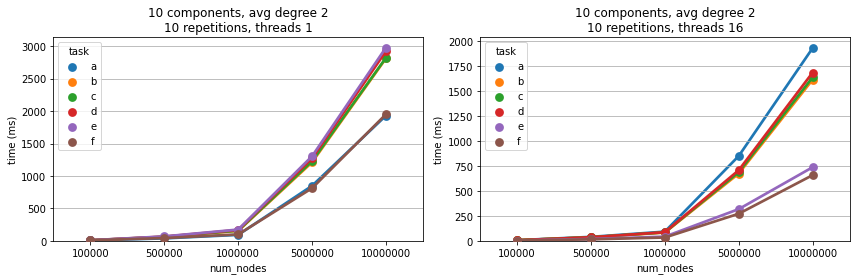

In [3]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
for ax, num_threads in zip(axes, (1, 16)):
    data = df[df["num_threads"] == num_threads]
    ax.set_ylim((0, data["time (ms)"].max() * 1.05))
    ax.grid(True)
    ax.set_title(f"10 components, avg degree 2\n10 repetitions, threads {num_threads}")
    sns.pointplot(x="num_nodes", y="time (ms)", hue="task", data=data, ax=ax)
fig.tight_layout()
plt.savefig(f"exp1-time.pdf", dpi=300)
plt.show()

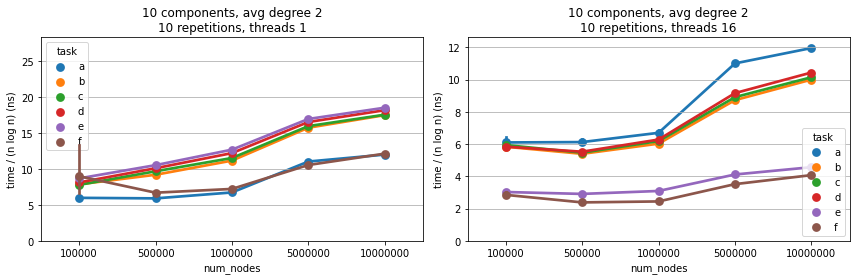

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
for ax, num_threads in zip(axes, (1, 16)):
    data = df[df["num_threads"] == num_threads]
    ax.set_ylim((0, data["time / (n log n) (ns)"].max() * 1.05))
    ax.grid(True)
    ax.set_title(f"10 components, avg degree 2\n10 repetitions, threads {num_threads}")
    sns.pointplot(x="num_nodes", y="time / (n log n) (ns)", hue="task", data=data, ax=ax)
fig.tight_layout()
plt.savefig(f"exp1-time-n-log-n.pdf", dpi=300)
plt.show()

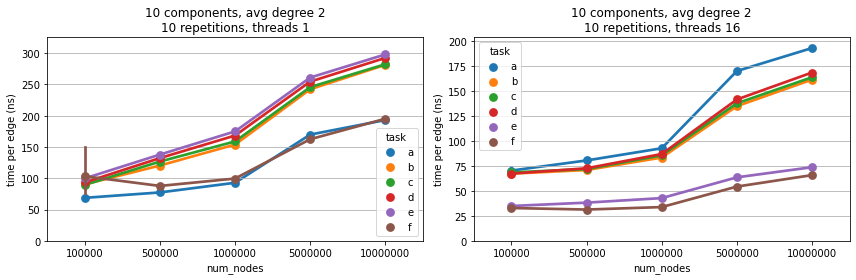

In [5]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
for ax, num_threads in zip(axes, (1, 16)):
    data = df[df["num_threads"] == num_threads]
    ax.set_ylim((0, data["time per edge (ns)"].max() * 1.05))
    ax.grid(True)
    ax.set_title(f"10 components, avg degree 2\n10 repetitions, threads {num_threads}")
    sns.pointplot(x="num_nodes", y="time per edge (ns)", hue="task", data=data, ax=ax)
fig.tight_layout()
plt.savefig(f"exp1-time-per-edge.pdf", dpi=300)
plt.show()

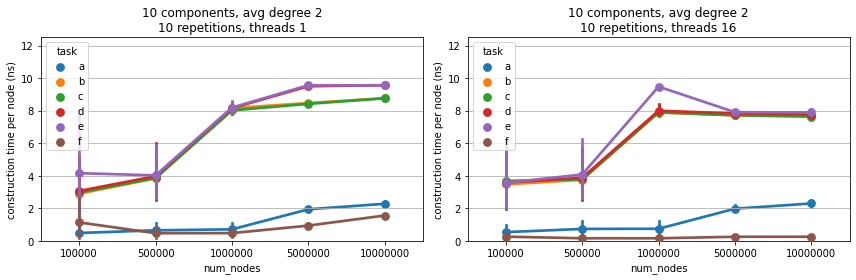

In [6]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
for ax, num_threads in zip(axes, (1, 16)):
    data = df[df["num_threads"] == num_threads]
    ax.set_ylim((0, 12.5))
    ax.grid(True)
    ax.set_title(f"10 components, avg degree 2\n10 repetitions, threads {num_threads}")
    sns.pointplot(x="num_nodes", y="construction time per node (ns)", hue="task", data=data, ax=ax)
fig.tight_layout()
plt.savefig(f"exp1-time-construction-per-node.pdf", dpi=300)
plt.show()

In [7]:
df = pd.read_csv("exp2-16-10-n.csv", delim_whitespace=True)
df["graph"] = df["graph"].str.split("/").str[-1]
df["time (ms)"] = df["time"]
df["time per node (ns)"] = df["time"] / df["num_nodes"] * 10**6
df["time per edge (ns)"] = df["time"] / df["num_edges"] * 10**6
df["construction time per node (ns)"] = df["construction_time"] / df["num_nodes"] * 10**6
df["construction time per edge (ns)"] = df["construction_time"] / df["num_edges"] * 10**6
df["n log n"] = df["num_nodes"] * np.log(df["num_nodes"])
df["time / (n log n) (ns)"] = df["time"] / df["n log n"] * 10**6

df.head()

,task,graph,num_nodes,num_edges,num_threads,construction_time,time,time (ms),time per node (ns),time per edge (ns),construction time per node (ns),construction time per edge (ns),n log n,time / (n log n) (ns)
0,a,1e2x-1e5-2.graph,10000000,10000000,1,25.5319,1935.11,1935.11,193.511,193.511,2.55319,2.55319,1.611810e+08,12.005823
1,a,1e2x-1e5-2.graph,10000000,10000000,1,25.4031,1935.32,1935.32,193.532,193.532,2.54031,2.54031,1.611810e+08,12.007126
2,a,1e2x-1e5-2.graph,10000000,10000000,1,25.4165,1933.81,1933.81,193.381,193.381,2.54165,2.54165,1.611810e+08,11.997757
3,a,1e2x-1e5-2.graph,10000000,10000000,1,25.4641,1933.22,1933.22,193.322,193.322,2.54641,2.54641,1.611810e+08,11.994097
4,a,1e2x-1e5-2.graph,10000000,10000000,1,25.5214,1937.30,1937.30,193.730,193.730,2.55214,2.55214,1.611810e+08,12.019410


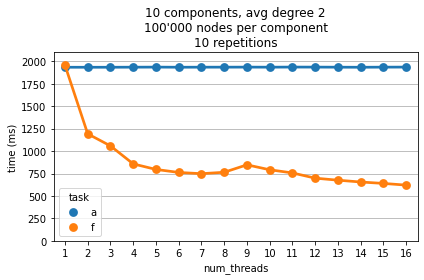

In [8]:
fig, ax = plt.subplots()
ax.set_ylim((0, 2100))
ax.grid(True)
ax.set_title(f"10 components, avg degree 2\n100'000 nodes per component\n10 repetitions")
sns.pointplot(x="num_threads", y="time (ms)", hue="task", data=df, ax=ax)
fig.tight_layout()
plt.savefig("exp2-f-time.pdf", dpi=300)
plt.show()

In [9]:
df_f = df[df["task"] == "f"].copy()


T0 = df.loc[df["task"] == "a","time"].mean()

df_f["speedup"] = T0 / df_f["time"]
df_f["effiency"] = df_f["speedup"] / df_f["num_threads"]

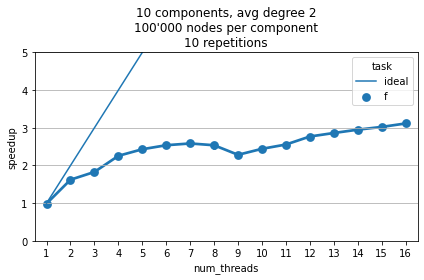

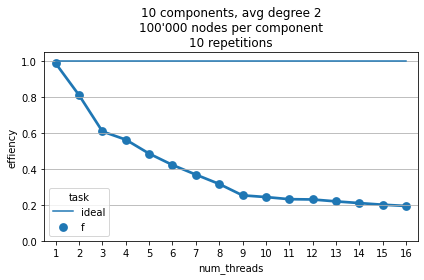

In [10]:
fig, ax = plt.subplots()
ax.set_ylim((0, 5))
ax.grid(True)
ax.set_title(f"10 components, avg degree 2\n100'000 nodes per component\n10 repetitions")
ax.plot(range(0, 16), range(1, 17), label="ideal")
sns.pointplot(x="num_threads", y="speedup", hue="task", data=df_f, ax=ax)
fig.tight_layout()
plt.savefig("exp2-f-speedup.pdf", dpi=300)
plt.show()


fig, ax = plt.subplots()
ax.set_ylim((0, 1.05))
ax.grid(True)
ax.set_title(f"10 components, avg degree 2\n100'000 nodes per component\n10 repetitions")
ax.plot(range(0, 16), [1] * 16, label="ideal")
sns.pointplot(x="num_threads", y="effiency", hue="task", data=df_f, ax=ax)
fig.tight_layout()
plt.savefig("exp2-f-effiency.pdf", dpi=300)
plt.show()

In [11]:
df = pd.read_csv("exp2-16-10.fail.csv", delim_whitespace=True)
df["graph"] = df["graph"].str.split("/").str[-1]
df["time (ms)"] = df["time"]
df["time per node (ns)"] = df["time"] / df["num_nodes"] * 10**6
df["time per edge (ns)"] = df["time"] / df["num_edges"] * 10**6
df["construction time per node (ns)"] = df["construction_time"] / df["num_nodes"] * 10**6
df["construction time per edge (ns)"] = df["construction_time"] / df["num_edges"] * 10**6
df["n log n"] = df["num_nodes"] * np.log(df["num_nodes"])
df["time / (n log n) (ns)"] = df["time"] / df["n log n"] * 10**6

df.head()

,task,graph,num_nodes,num_edges,num_threads,construction_time,time,time (ms),time per node (ns),time per edge (ns),construction time per node (ns),construction time per edge (ns),n log n,time / (n log n) (ns)
0,a,1e2x-1e5-2.graph,10000000,10000000,1,25.8683,1943.47,1943.47,194.347,194.347,2.58683,2.58683,1.611810e+08,12.057690
1,a,1e2x-1e5-2.graph,10000000,10000000,1,25.5735,1943.52,1943.52,194.352,194.352,2.55735,2.55735,1.611810e+08,12.058000
2,a,1e2x-1e5-2.graph,10000000,10000000,1,25.5684,1938.50,1938.50,193.850,193.850,2.55684,2.55684,1.611810e+08,12.026855
3,a,1e2x-1e5-2.graph,10000000,10000000,1,25.6072,1941.17,1941.17,194.117,194.117,2.56072,2.56072,1.611810e+08,12.043420
4,a,1e2x-1e5-2.graph,10000000,10000000,1,25.4799,1944.21,1944.21,194.421,194.421,2.54799,2.54799,1.611810e+08,12.062281


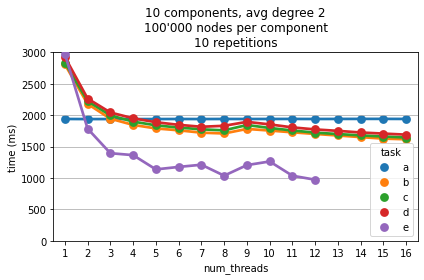

In [12]:
fig, ax = plt.subplots()
ax.set_ylim((0, 3000))
ax.grid(True)
ax.set_title(f"10 components, avg degree 2\n100'000 nodes per component\n10 repetitions")
sns.pointplot(x="num_threads", y="time (ms)", hue="task", data=df, ax=ax)
fig.tight_layout()
#plt.savefig("exp2-time.pdf", dpi=300)
plt.show()

In [14]:
df = pd.read_csv("exp4-16-10.csv", delim_whitespace=True)
df["graph"] = df["graph"].str.split("/").str[-1]
df["time (ms)"] = df["time"]
df["time per node (ns)"] = df["time"] / df["num_nodes"] * 10**6
df["time per edge (ns)"] = df["time"] / df["num_edges"] * 10**6
df["construction time per node (ns)"] = df["construction_time"] / df["num_nodes"] * 10**6
df["construction time per edge (ns)"] = df["construction_time"] / df["num_edges"] * 10**6
df["n log n"] = df["num_nodes"] * np.log(df["num_nodes"])
df["time / (n log n) (ns)"] = df["time"] / df["n log n"] * 10**6

df.head()

,task,graph,num_nodes,num_edges,num_threads,construction_time,time,time (ms),time per node (ns),time per edge (ns),construction time per node (ns),construction time per edge (ns),n log n,time / (n log n) (ns)
0,a,1e1x-1e6-2.graph,10000000,10000000,1,25.6378,1934.99,1934.99,193.499,193.499,2.56378,2.56378,1.611810e+08,12.005078
1,a,1e1x-1e6-2.graph,10000000,10000000,2,25.6030,1936.75,1936.75,193.675,193.675,2.56030,2.56030,1.611810e+08,12.015998
2,a,1e1x-1e6-2.graph,10000000,10000000,3,25.9293,1936.52,1936.52,193.652,193.652,2.59293,2.59293,1.611810e+08,12.014571
3,a,1e1x-1e6-2.graph,10000000,10000000,4,26.0085,1933.72,1933.72,193.372,193.372,2.60085,2.60085,1.611810e+08,11.997199
4,a,1e1x-1e6-2.graph,10000000,10000000,5,26.0217,1938.15,1938.15,193.815,193.815,2.60217,2.60217,1.611810e+08,12.024684


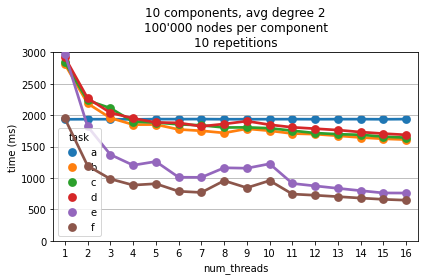

In [15]:
fig, ax = plt.subplots()
ax.set_ylim((0, 3000))
ax.grid(True)
ax.set_title(f"10 components, avg degree 2\n100'000 nodes per component\n1 repetitions")
sns.pointplot(x="num_threads", y="time (ms)", hue="task", data=df, ax=ax)
fig.tight_layout()
plt.savefig("exp4-time.pdf", dpi=300)
plt.show()